<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/1_Prediction_of_your_future_based_on_hand_palm_outline_or_face_or_fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liên kết Google Drive để lấy dữ liệu 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Khai báo Thư viện sử dụng 

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape


In [3]:
data="/content/drive/MyDrive/Chi Tay_Data/"

In [4]:
x,y=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(200,200))
                pixel=img_to_array(pixel)
                x.append(pixel)
                y.append( folder)

x =asarray(x)
y =asarray(y)

Folder= vanmenh1
Folder= vanmenh5
Folder= vanmenh4
Folder= vanmenh3
Folder= vanmenh2


# 3.Tạo one_hot_encoding

In [5]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
#print(y)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((x,y), file)
# close the file
file.close()

In [6]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (x, y) = pickle.load(file)
    # close the file
    file.close()
    return x, y

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

#chuyển đổi dữ liệu tránh overload
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(56, 5)


# 4.Tạo Model & Train Model

In [9]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=  30   #số lần học
classes=5    #phân loại

#tao model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

# 5.Lưu Model đã train

In [10]:
model.save("/content/drive/MyDrive/Colab Notebooks/nhan_dang_chi_tay.h5")

# 6.Tải Model đã train và dự đoán 

1/1 [==============================] - 0s 75ms/step
This is:  vanmenh4:nguoi hiền lạnh , đường công danh rộng mở  [ 1.3214787   2.480824    7.6827974  88.10094     0.41396835]
0.88100934


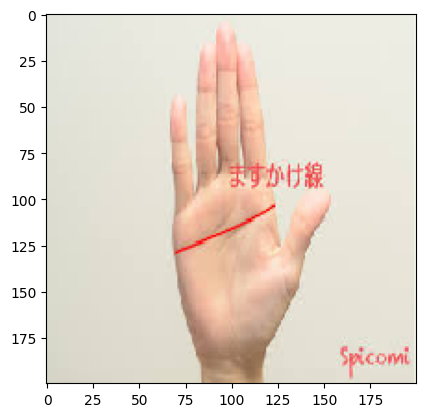

In [13]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/nhan_dang_chi_tay.h5")

import numpy as np
class_name = ['vanmenh1: gia đạo bình an , làm ăn phát đạt','vanmenh2: có may mắn , được quý nhân phù trợ','vanmenh3:vất vả khó làm ăn ','vanmenh4:nguoi hiền lạnh , đường công danh rộng mở ','vanmenh5:tương lai nhờ nhà vợ ']

img = load_img('/content/drive/MyDrive/Chi Tay_Data/vanmenh4/images (20).jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])], (predict[0]*100))
print(np.max(predict[0],axis=0))